In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv('winemag-data_first150k.csv')
print(wine.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


# Plot one variable 4 ways

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


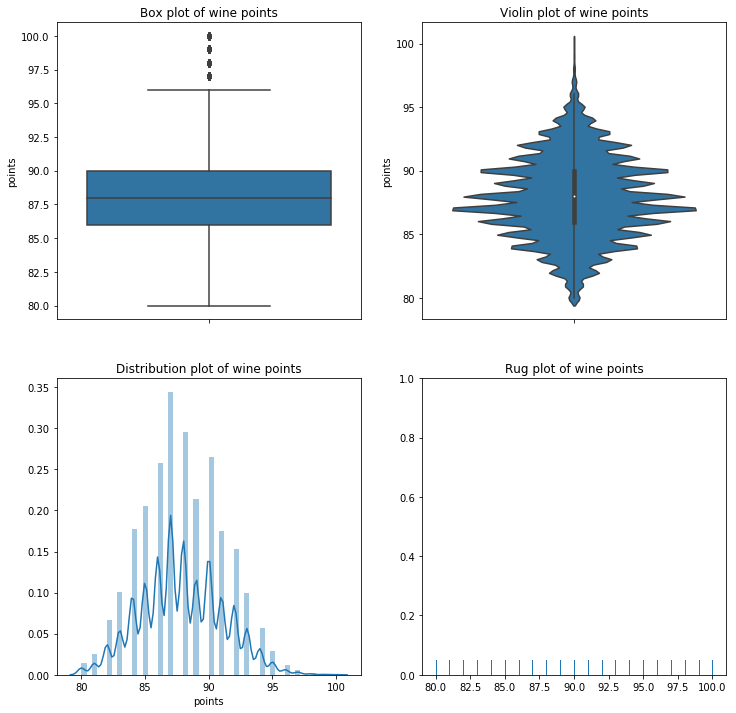

In [3]:
plt.figure(figsize = (12, 12))
plt.subplot(221)
ax1 = sns.boxplot(y=wine['points'])
plt.title('Box plot of wine points')

plt.subplot(222)
ax2 = sns.violinplot(y=wine['points'])
plt.title('Violin plot of wine points')

plt.subplot(223)
ax3 = sns.distplot(wine['points'])
plt.title('Distribution plot of wine points')

plt.subplot(224)
ax4 = sns.rugplot(wine['points'])
plt.title('Rug plot of wine points')

plt.show()

This box plot represents the data well. It shows the interquartile range, the mean, and outliers. It is a good representation of the data.

This violin plot shows a good amount of information about the dataset, including the interquartile range, the mean, and the probability density. It even shows the step-wise nature of the data. It is a great representation of the data.

This distribution plot largely just shows the distribution of the data, without providing a mean or identifing outliers. However, it does show the step-wise nature of the data. It is a good represenation of the data.

This rug plot shows the distribution of the data but that's all it shows. It's very limited in the information it provides and is a poor representation of the data alone.

# Plot two continuous variables 3 ways

<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

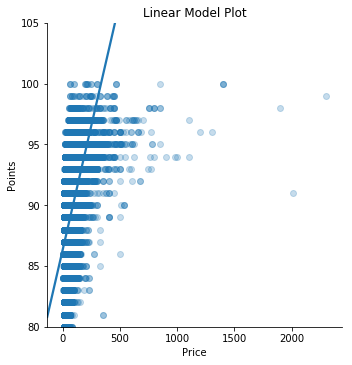

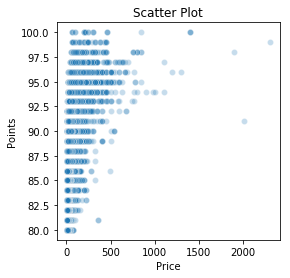

<Figure size 288x288 with 0 Axes>

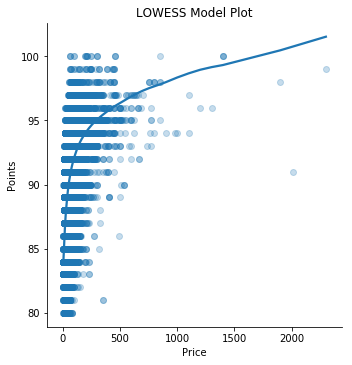

In [4]:
plt.clf()
plt.figure(figsize = (4, 4))
ax1 = sns.lmplot(x='price',
                 y='points', 
                 data=wine,
                 fit_reg=True, 
                 ci=False, 
                 scatter_kws={'alpha':0.25})
plt.ylim(80,105)
plt.title('Linear Model Plot')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

plt.figure(figsize = (4, 4))
ax2 = sns.scatterplot(x=wine['price'],
                      y=wine['points'],
                      alpha = 0.25)
plt.title('Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

plt.figure(figsize = (4, 4))
ax3 = sns.lmplot(x='price',
                 y='points', 
                 data=wine,
                 fit_reg=True, 
                 ci=False, 
                 scatter_kws={'alpha':0.25},
                 lowess=True)
plt.title('LOWESS Model Plot')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()

This linear model plot shows the data and provides a linear estimate to estimate the data trend.

This scatter plot just shows the data as it falls, leaving the audience to interpret data on their own.

This LOWESS model plot shows the data and provides a LOWESS(Locally Weighted Scatterplot Smoothing) estimate to estimate the nature of the data.

# Plot one continuous variable and one categorical variable 6 ways

<Figure size 432x432 with 0 Axes>

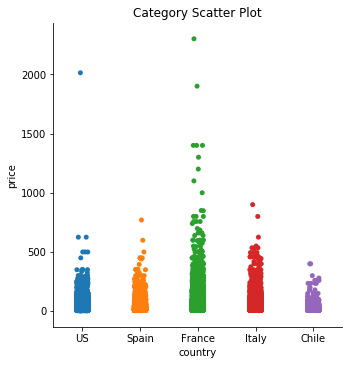

<Figure size 432x432 with 0 Axes>

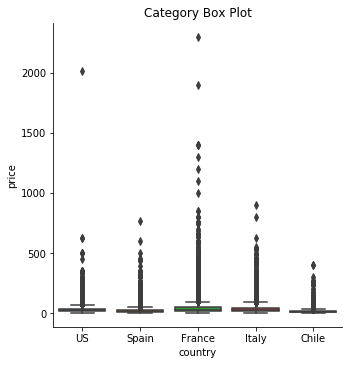

<Figure size 432x432 with 0 Axes>

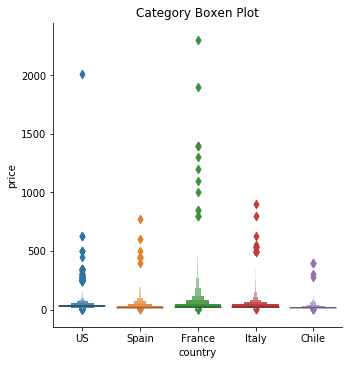

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x432 with 0 Axes>

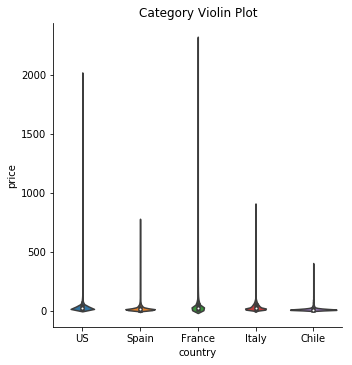

<Figure size 432x432 with 0 Axes>

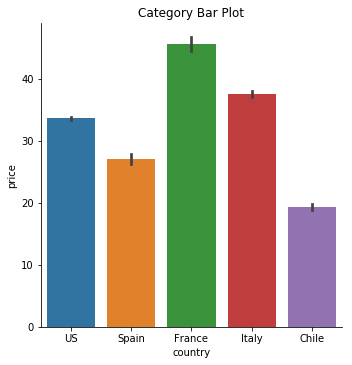

A swarm plot was attempted but would time out and prevent all other code from appearing in the output due to a large dataset. Thus, it was not appropriate for this dataset wand woulprovide no menaingful insights for a dataset at this scale. Even when trimmed down from 150K to select to top five contributing countries, 120K entries remain.


In [12]:
top_countries = wine['country'].value_counts().head(5).index
wine_top5 = wine[(wine['country'] == 'US') | 
                 (wine['country'] == 'Italy') | 
                 (wine['country'] == 'France') | 
                 (wine['country'] == 'Spain') | 
                 (wine['country'] == 'Chile')]

plt.figure(figsize = (6,6))
ax1 = sns.catplot(data=wine_top5, x='country',y='price')
plt.title('Category Scatter Plot')
plt.show()

plt.figure(figsize = (6,6))
ax2 = sns.catplot(data=wine_top5, x='country',y='price', kind='box')
plt.title('Category Box Plot')
plt.show()

plt.figure(figsize = (6,6))
ax3 = sns.catplot(data=wine_top5, x='country',y='price', kind='boxen')
plt.title('Category Boxen Plot')
plt.show()

plt.figure(figsize = (6,6))
ax4 = sns.catplot(data=wine_top5, x='country',y='price', kind='violin')
plt.title('Category Violin Plot')
plt.show()

plt.figure(figsize = (6,6))
ax5 = sns.catplot(data=wine_top5, x='country',y='price', kind='bar')
plt.title('Category Bar Plot')
plt.show()

#plt.figure(figsize = (6,6))
#ax6 = sns.catplot(data=wine_top5, x='country',y='price', kind='swarm')
#plt.title('Category Swarm Plot')
#plt.show()
#print(wine_top5.count())
print('A swarm plot was attempted but would time out and prevent all other code from appearing in the output due to a large dataset. Thus, it was not appropriate for this dataset wand woulprovide no menaingful insights for a dataset at this scale. Even when trimmed down from 150K to select to top five contributing countries, 120K entries remain.')

This category scatter plot provides an appealing visual but pvodes very little useful information.

This category box plot provides useful information on outliers, interquartile range, and the mean.

This category boxen plotprovides useful information on outliers, interquartile range, the mean, and is more useful to represent large datasets like this one. Potentially the best plot fot this data.

This category violin plot provides useful information on outliers, interquartile range, the mean, and kernal density. Potentially the best plot for this data

This Category bar plot doesn't relay much useful information aside from the mean price of a bottle by country with an error bar.

A category swarm plot was attempted but would time out and prevent all other code from appearing in the output due to a large dataset. Thus, it was not appropriate for this dataset wand woulprovide no menaingful insights for a dataset at this scale. Even when trimmed down from 150K to select to top five contributing countries, 120K entries remain.